In [1]:
import nltk # natural language processing
import matplotlib as plt # create plots
import seaborn as sns # create plots
import requests # download text
import pandas as pd # work with dataframes

from sklearn.decomposition import LatentDirichletAllocation # LDA
from sklearn.feature_extraction.text import CountVectorizer

## Topic Modeling

- LDA: Latent Dirichlet Allocation
    - Find hidden models within the data
    - Invented by David M. Blei (Statistics Prof @ Columbia)
    - Deals with a *collection* of documents

## 1. Context Research

Principles of Stoicism
1. Nature
2. Virtue
3. Wisdom
4. Reason
5. Pleasure
6. Evil
7. Duty
8. Apathea


## 2. Setting up data

In [3]:
# download data
response1 = requests.get('http://classics.mit.edu/Antoninus/meditations.mb.txt') # Meditations by Marcus
response2 = requests.get('http://classics.mit.edu/Epictetus/discourses.mb.txt') # Discourses by Epictetus
response3 = requests.get('http://classics.mit.edu/Epictetus/epicench.1b.txt') # Enchiridion by Epictetus
filename4 = open('/Users/stellajia/Desktop/UCSB/Fall-2022/ENGL197/stoic-analysis/data/shortness-of-life.txt') # Shortness of Life by Seneca
filename5 = open('/Users/stellajia/Desktop/UCSB/Fall-2022/ENGL197/stoic-analysis/data/letters-from-a-stoic.txt') # Letters from a Stoic by Seneca

doc1 = response1.text
doc2 = response2.text
doc3 = response3.text
doc4 = filename4.read()
doc5 = filename5.read()

filename6 = open('/Users/stellajia/Desktop/UCSB/Fall-2022/ENGL197/stoic-analysis/data/daily-stoic.txt') # Daily Stoic by Ryan Holiday (2016)
filename7 = open('/Users/stellajia/Desktop/UCSB/Fall-2022/ENGL197/stoic-analysis/data/guide-to-good-life.txt') # Guide to a Good Life by William Irvine (2008)
filename8 = open('/Users/stellajia/Desktop/UCSB/Fall-2022/ENGL197/stoic-analysis/data/stillness-is-key.txt') # Stillness is Key by Ryan Holiday (2019)
filenmae9 = open('/Users/stellajia/Desktop/UCSB/Fall-2022/ENGL197/stoic-analysis/data/how-to-be-a-stoic.txt') # How to Be a Stoic by Massimo Pigliucci (2017)
filename10 = open('/Users/stellajia/Desktop/UCSB/Fall-2022/ENGL197/stoic-analysis/data/think-like-a-roman-emperor.txt') # How to Think Like a Roman Emperor by Donald Robertson (2019)

doc6 = filename6.read() 
doc7 = filename7.read()
doc8 = filename8.read()
doc9 = filenmae9.read()
doc10 = filename10.read()

In [46]:
# group documents
stoicDocs = [doc1, doc2, doc3, doc4, doc5, doc6, doc7, doc8, doc9, doc10]

## 2. Explore data

In [47]:
# remove stop words
countVectorizer = CountVectorizer(stop_words='english')

In [48]:
stoicCounts = countVectorizer.fit_transform(stoicDocs)
stoicLabel = ['Meditations', 'Discourses', 'Enchiridion', 'Shortness of Life', 'Letters from a Stoic', 'Daily Stoic', 
             'Guide to a Good Life', 'Stillness is Key', 'How to Be a Stoic', 'How to Think Like a Roman Emperor']
wordLabel = countVectorizer.get_feature_names()

/Users/stellajia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [49]:
# document term matrix
pd.DataFrame(stoicCounts.todense(), index = stoicLabel, columns = wordLabel)

,00,000,0039b6,02,08,09,0ab5ox,0gxoyv,0xxdrl,10,...,ﬂour,ﬂourish,ﬂourished,ﬂow,ﬂowed,ﬂu,ﬂustered,ﬂux,ﬂy,ﱮﱭ
Meditations,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Discourses,0,0,4,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
Enchiridion,0,0,4,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
Shortness of Life,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Letters from a Stoic,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Daily Stoic,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
Guide to a Good Life,1,0,0,0,0,0,0,0,0,56,...,1,5,3,3,2,2,1,1,1,8
Stillness is Key,0,5,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
How to Be a Stoic,0,5,0,1,2,1,1,1,1,29,...,0,0,0,0,0,0,0,0,0,0
How to Think Like a Roman Emperor,0,2,0,0,0,0,0,0,0,36,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# remove numbers
wordLabelNoNums = [label for label in wordLabel if label.isalpha()]
countVectorizerNoNums = CountVectorizer(stop_words='english', max_df = 0.7, vocabulary = wordLabelNoNums)
stoicCountsNoNums = countVectorizerNoNums.fit_transform(stoicDocs)
stoic_df = pd.DataFrame(stoicCountsNoNums.todense(), index = stoicLabel, columns = wordLabelNoNums)
stoic_df

,aa,aaron,abad,abandon,abandoned,abandoning,abandonment,abandons,abate,abated,...,ﬂour,ﬂourish,ﬂourished,ﬂow,ﬂowed,ﬂu,ﬂustered,ﬂux,ﬂy,ﱮﱭ
Meditations,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Discourses,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Enchiridion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Shortness of Life,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Letters from a Stoic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Daily Stoic,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Guide to a Good Life,0,0,0,7,2,1,2,1,0,0,...,1,5,3,3,2,2,1,1,1,8
Stillness is Key,1,0,1,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
How to Be a Stoic,0,3,0,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
How to Think Like a Roman Emperor,0,4,0,4,1,1,0,0,6,4,...,0,0,0,0,0,0,0,0,0,0


In [51]:
lda = LatentDirichletAllocation(n_components=8)

In [52]:
ldaStoic = lda.fit_transform(stoicCountsNoNums)

In [53]:
# probability of seeing each word in a topic
topicWordMatrix = pd.DataFrame(lda.components_, index = ['Topic ' + str(x) for x in range(8)], columns = wordLabelNoNums)
topicWordMatrix

,aa,aaron,abad,abandon,abandoned,abandoning,abandonment,abandons,abate,abated,...,ﬂour,ﬂourish,ﬂourished,ﬂow,ﬂowed,ﬂu,ﬂustered,ﬂux,ﬂy,ﱮﱭ
Topic 0,0.125,3.124999,0.125,8.125,4.124999,1.125,2.125,1.125,0.125,0.125,...,1.125,5.125,3.125,3.125,2.125,2.125,1.125,1.125,1.125,8.125
Topic 1,0.125,0.125000,0.125,0.125,0.125000,0.125,0.125,0.125,0.125,0.125,...,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125
Topic 2,0.125,0.125001,0.125,0.125,0.125001,0.125,0.125,0.125,0.125,0.125,...,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125
Topic 3,0.125,0.125000,0.125,0.125,0.125000,0.125,0.125,0.125,0.125,0.125,...,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125
Topic 4,0.125,0.125000,0.125,0.125,0.125000,0.125,0.125,0.125,0.125,0.125,...,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125
Topic 5,1.125,0.125000,1.125,3.125,2.125000,1.125,0.125,0.125,0.125,0.125,...,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125
Topic 6,0.125,0.125000,0.125,0.125,0.125000,0.125,0.125,0.125,0.125,0.125,...,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125
Topic 7,0.125,4.125000,0.125,5.125,2.125000,2.125,0.125,0.125,6.125,4.125,...,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125


## 3. Topic Outputs

In [54]:
# top words in Topic 0 
topicWordMatrix.loc['Topic 0'].sort_values(ascending=False).head(15)

life          728.178644
stoicism      621.125004
stoics        570.119427
stoic         554.109597
epictetus     492.847069
people        469.904004
things        464.873600
philosophy    412.598728
seneca        325.522921
control       279.990804
good          277.808839
time          276.541388
way           237.804516
example       225.702048
marcus        211.124918
Name: Topic 0, dtype: float64

In [55]:
def getWords(topicName):
    return ' '.join(list(topicWordMatrix.loc[topicName].sort_values(ascending=False).head(15).index))

In [56]:
viewTopics = pd.DataFrame((getWords(topicName) for topicName in ('Topic ' + str(x) for x in range(8))), 
             index = ['Topic ' + str(x) for x in range(8)],
             columns = ['Words'])

with pd.option_context('display.max_colwidth', None):
  display(viewTopics)

,Words
Topic 0,life stoicism stoics stoic epictetus people things philosophy seneca control good time way example marcus
Topic 1,essential utterly missing instant starting unpleasant maxims suppress grasp slide entertain lessen dreading promised attendance
Topic 2,man things thou say does good nature shall power men thing ought thy reason like
Topic 3,essential utterly missing instant starting unpleasant maxims suppress grasp slide entertain lessen dreading promised attendance
Topic 4,seneca emperor nero introduction ae father imperial tacitus public rome ex agrippina style claudius authority
Topic 5,life time people stillness just like world work said mind way think don good day
Topic 6,ll life time ve short year leisure existence com long wealth complain live given tion
Topic 7,marcus reflection stoic morning evening life daily journal things meditations like week stoics people way


In [58]:
topicLabelWords = [getWords(topicName) for topicName in ('Topic ' + str(x) for x in range(8))]

<AxesSubplot:>

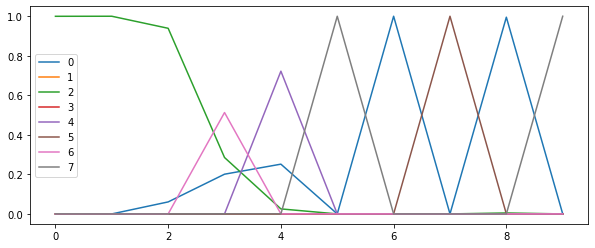

In [61]:
# pd.DataFrame(ldaStoic, columns = topicLabelWords).plot(figsize=(10,4))
pd.DataFrame(ldaStoic).plot(figsize=(10,4))

## 4. Concluding thoughts

Trying to extrapolate topics from a subtopic like Stoicism is tricky. A lot of the principles in Stoicism are highly interconnected (nature, wisdom, pleasure, evil, duty). Overall, the topic model result was not that fruitful and I encountered some errors like repeating topics (Topic 2 and 3). I would like to look into this some more in the future and experiment with using different tools to create the topic model like spaCy and pyLDAvis (brought up by Professor Liu). 

Beyond this exercise, it would be interesting to do an LDA comparing other topics with Stoicism since looking within Stoicism doesn't yield much in a probabilistic sense. For example, comparing Stoicism with religious and scientific texts might create more meaningful topic outcomes. Additionally, comparing starkly different mediums (social media vs books). 

Some questions I have that I'd like to dig more into are: How can we make LDA more sophisticated to identify abstract topics like wisdom, pleasure, etc? How can probabilistic methods be combined with domain knowledge?